In [ ]:
import math as mt
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from statsmodels.tsa.stattools import adfuller

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.set_index('Month', inplace=True)
data.index=pd.to_datetime(data.index)

In [ ]:
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [ ]:
data.resample(rule = 'AS').mean().head()

<ipython-input-6-59d4c63a74f3>:1: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  data.resample(rule = 'AS').mean().head()


,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


In [ ]:
data.shift(2, axis =0).head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


In [ ]:
rilling_mean = data.rolling(window=12).mean()
print(rilling_mean.head())

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN


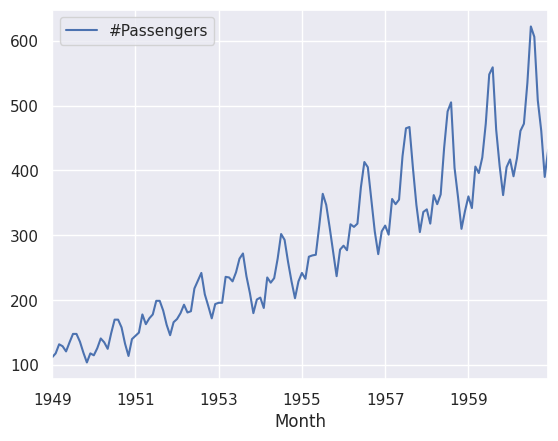

In [ ]:
data.plot()
plt.plot(rilling_mean)
plt.show()

In [ ]:
adf_test = adfuller(data['#Passengers'])

print('p-value: ' + str(adf_test[1]))

p-value: 0.991880243437641


<Axes: xlabel='Month'>

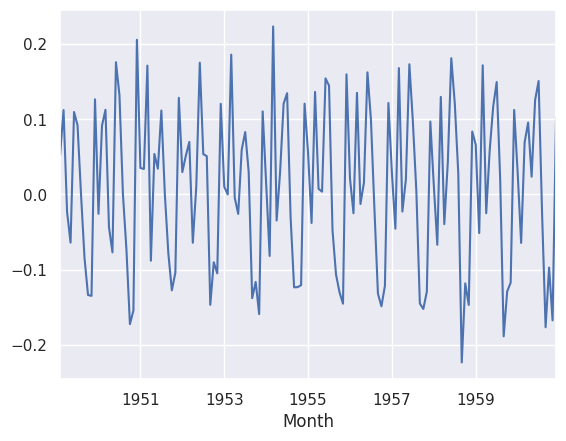

In [ ]:
data['#Passengers_log'] = np.log(data['#Passengers'])
data['#Passengers_log_diff'] = data['#Passengers_log'] - data['#Passengers_log'].shift(1)
data['#Passengers_log_diff'].dropna().plot()

Parameter d

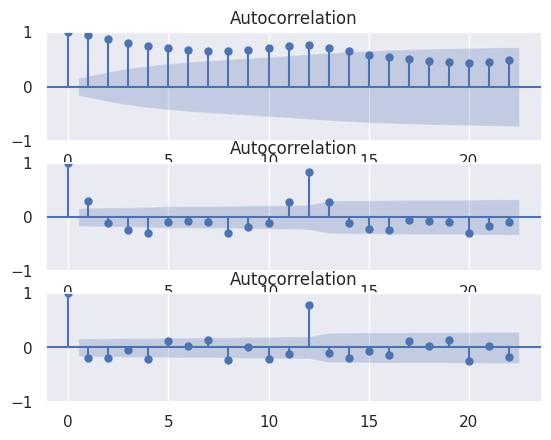

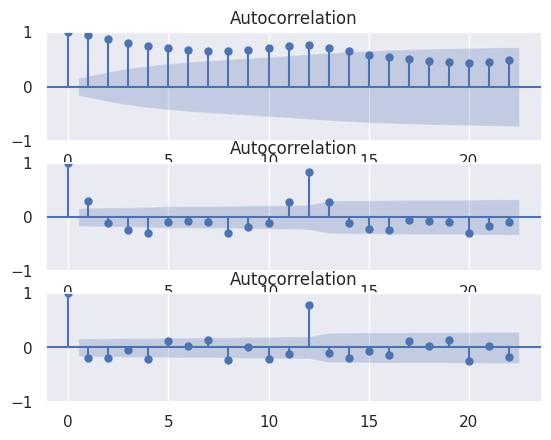

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data['#Passengers'], ax=ax1)
plot_acf(data['#Passengers'].diff().dropna(), ax=ax2)
plot_acf(data['#Passengers'].diff().diff().dropna(), ax=ax3)

Parameter p

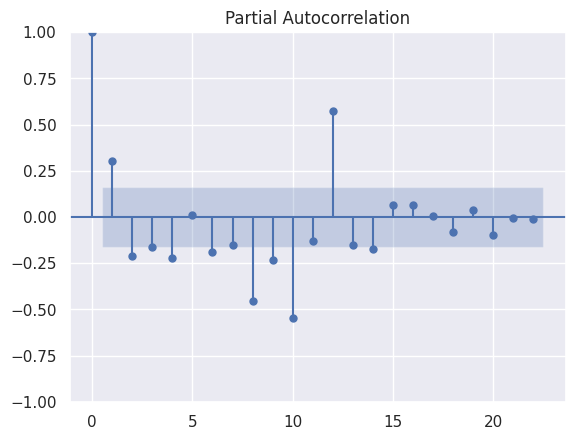

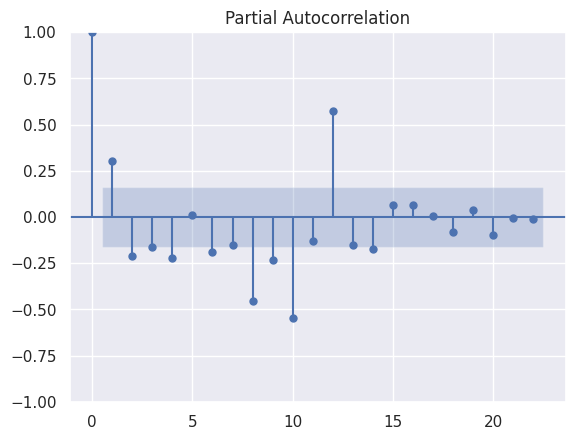

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['#Passengers'].diff().dropna())

Parameter q

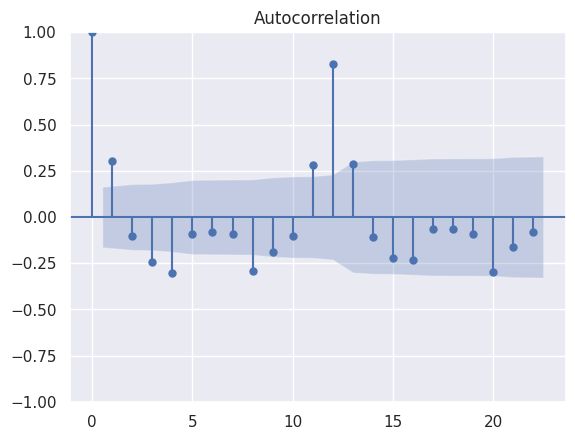

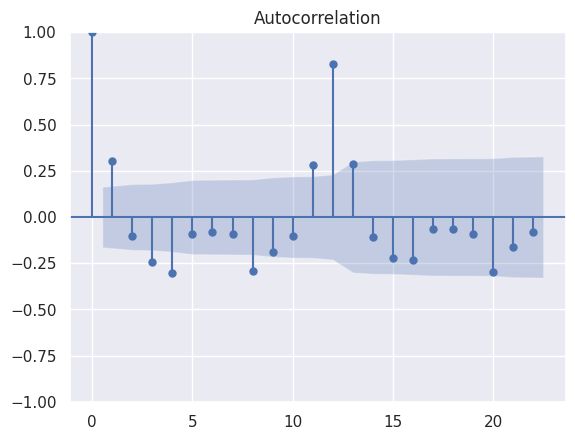

In [ ]:
plot_acf(data['#Passengers'].diff().dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               ARIMA(12, 1, 12)   Log Likelihood                -552.398
Date:                Tue, 10 Dec 2024   AIC                           1154.796
Time:                        14:10:44   BIC                           1228.867
Sample:                    01-01-1949   HQIC                          1184.895
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0800      1.224      0.065      0.948      -2.318       2.478
ar.L2         -0.0807      1.266     -0.064      0.949      -2.562       2.400
ar.L3          0.0254      1.298      0.020      0.9

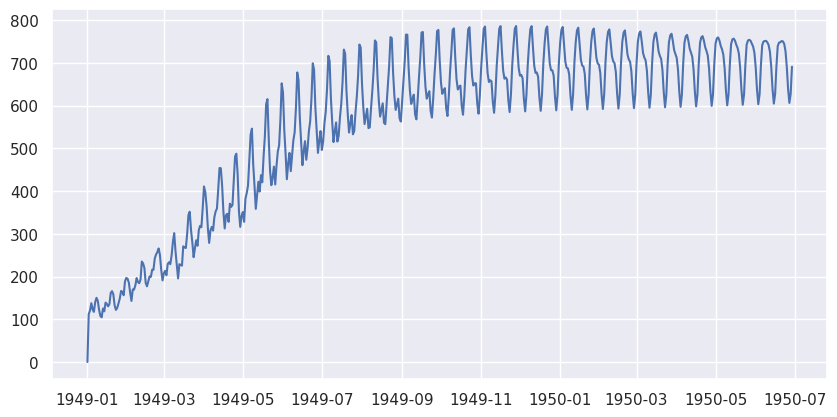

In [ ]:
plt.figure().set_figwidth(10)
model = ARIMA(data['#Passengers'], order=(12, 1, 12))
model_fit = model.fit()

forecast_horizon = 400
forecast_ar = model_fit.predict(start=0, end=len(data['#Passengers']) + forecast_horizon)

forecast_index_ar = pd.date_range(start=data['#Passengers'].index[0], periods=len(forecast_ar))
plt.plot(forecast_index_ar, forecast_ar, label='Предсказанный ряд')
print(model_fit.summary())

<Axes: >

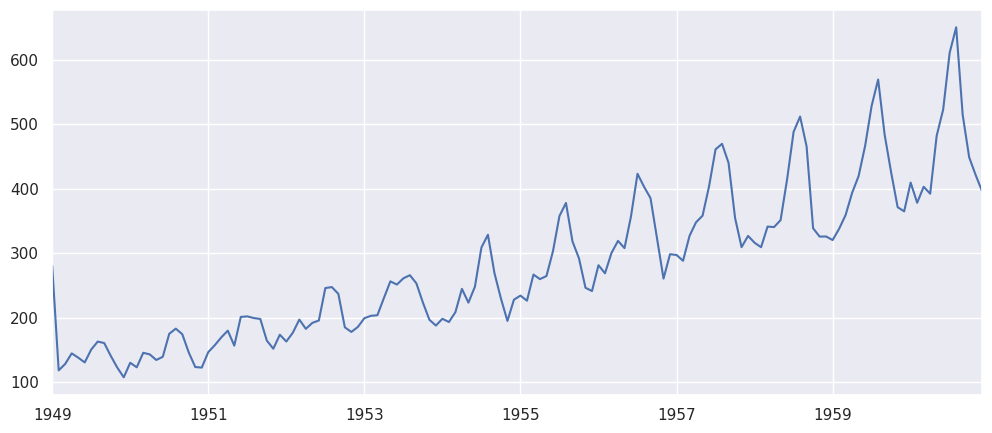

In [ ]:
fig, ax = plt.subplots(figsize=(12,5), dpi=100)
model_fit.predict().plot(ax=ax)